<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Фиксируем сиды, чтобы результаты со случайностью были воспроизводимыми — каждый запуск кода даёт те же числа.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [5]:
from IPython.display import display

# Настройки, чтобы данные не обрезались
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

display(df_train.sample(30, random_state=42))

display(df_test.head(5))
display(df_test.tail(5))

missing_cols = df_test.columns[df_test.isnull().any()]
display(missing_cols)

display(df_test.duplicated().sum())
display(df_test[df_test.duplicated()])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

np.int64(62)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
200,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
235,Hyundai Grand i10 1.2 CRDi Sportz,2017,450000,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
238,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
253,Tata Safari Storme EX,2015,503000,110000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0
269,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
270,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
283,Honda Jazz VX,2016,550000,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.2 kmpl,1199 CC,88.7 bhp,110Nm@ 4800rpm,5.0
289,Honda Jazz VX,2016,550000,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.2 kmpl,1199 CC,88.7 bhp,110Nm@ 4800rpm,5.0
290,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
299,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0


Можно понять: структуру данных, типы признаков, примерные значения и очевидные ошибки (NaN, странные форматы).  
Нельзя понять: распределения, выбросы, процент пропусков, дубликаты, корреляции и общую "чистоту" данных.  

Нет, duplicated() недостаточно, потому что он видит только полные совпадения и не находит частичные или скрытые дубликаты.

In [6]:
from ydata_profiling import ProfileReport

#Построение дашборда для train
train_report = ProfileReport(
    df_train,
    title="Cars Train Profiling Report",
    explorative=True
)
train_report.to_file("cars_train_report.html")

# Построение дашборда для test
test_report = ProfileReport(
    df_test,
    title="Cars Test Profiling Report",
    explorative=True
)
test_report.to_file("cars_test_report.html")

/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 358.79it/s]


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [7]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

# считаем медианы по train
medians = df_train[num_cols].median()

# заполняем train
df_train[num_cols] = df_train[num_cols].fillna(medians)

# заполняем test теми же медианами
df_test[num_cols] = df_test[num_cols].fillna(medians)

# проверка
print("Пропуски в train:", df_train.isna().sum().sum())
print("Пропуски в test:", df_test.isna().sum().sum())

Пропуски в train: 803
Пропуски в test: 76


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [8]:
# признаки без целевой переменной
feature_cols = df_train.columns.drop("selling_price")

# ищем повторяющиеся объекты по признакам
duplicate_mask = df_train.duplicated(subset=feature_cols, keep=False)

# число объектов с одинаковым признаковым описанием
num_duplicates = duplicate_mask.sum()
print("Количество частичных дубликатов:", num_duplicates)

Количество частичных дубликатов: 1799


In [9]:
duplicates = df_train[duplicate_mask].sort_values(by=feature_cols.tolist())
display(duplicates)

df_train = df_train.drop_duplicates(subset=feature_cols, keep='first')
df_train = df_train.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


In [10]:
df_train_cleaned = df_train.drop_duplicates(subset=feature_cols, keep='first')
df_train_cleaned = df_train_cleaned.reset_index(drop=True)

In [11]:
print(df_train.shape)
print(df_train.columns)

(5840, 13)
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


In [12]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [13]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [14]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [15]:
# Список столбцов для очистки
cols_to_clean = ["mileage", "engine", "max_power"]

for col in cols_to_clean:
    df_train[col] = df_train[col].str.extract(r'([0-9.]+)').astype(float)
    df_test[col]  = df_test[col].str.extract(r'([0-9.]+)').astype(float)
    
df_train = df_train.drop(columns=["torque"])
df_test = df_test.drop(columns=["torque"])

In [16]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [17]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [18]:
df_train["engine"] = df_train["engine"].fillna(df_train["engine"].median())
df_test["engine"]  = df_test["engine"].fillna(df_train["engine"].median())

In [19]:
df_train["engine"] = df_train["engine"].astype(int)
df_test["engine"] = df_test["engine"].astype(int)

df_train["seats"] = df_train["seats"].astype(int)
df_test["seats"] = df_test["seats"].astype(int)

In [20]:
print(df_train[["engine", "seats"]].isna().sum())
print(df_test[["engine", "seats"]].isna().sum())

engine    0
seats     0
dtype: int64
engine    0
seats     0
dtype: int64


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [21]:
# Числовые столбцы
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

print("Статистики числовых признаков — TRAIN:")
display(df_train[num_cols].describe())

print("\nСтатистики числовых признаков — TEST:")
display(df_test[num_cols].describe())

Статистики числовых признаков — TRAIN:


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5654.000000,5840.000000,5656.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.432842,1429.448973,88.103070,5.426712
std,4.095622,5.354320e+05,6.007114e+04,4.051002,485.662834,32.131943,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.800000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000



Статистики числовых признаков — TEST:


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000,1000.00000,981.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338206,1454.87600,91.015627,5.403000
std,4.012149,7.585539e+05,48486.218662,3.989872,521.99574,35.207383,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.500000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.00000,83.100000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [22]:
# Категориальные столбцы
cat_cols = df_train.select_dtypes(include=['object']).columns

print("Статистики категориальных признаков — TRAIN:")
display(df_train[cat_cols].describe())

print("\nСтатистики категориальных признаков — TEST:")
display(df_test[cat_cols].describe())

Статистики категориальных признаков — TRAIN:


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603



Статистики категориальных признаков — TEST:


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


Числовые признаки в train и test распределены почти одинаково, значит данные похожие и никаких сильных перекосов нет. Заполнение пропусков медианами ничего не испортило. Категориальные признаки тоже выглядят нормально — самые частые категории совпадают, и в тесте не появилось ничего нового.

In [23]:
df_train.shape

(5840, 12)

In [24]:
#assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

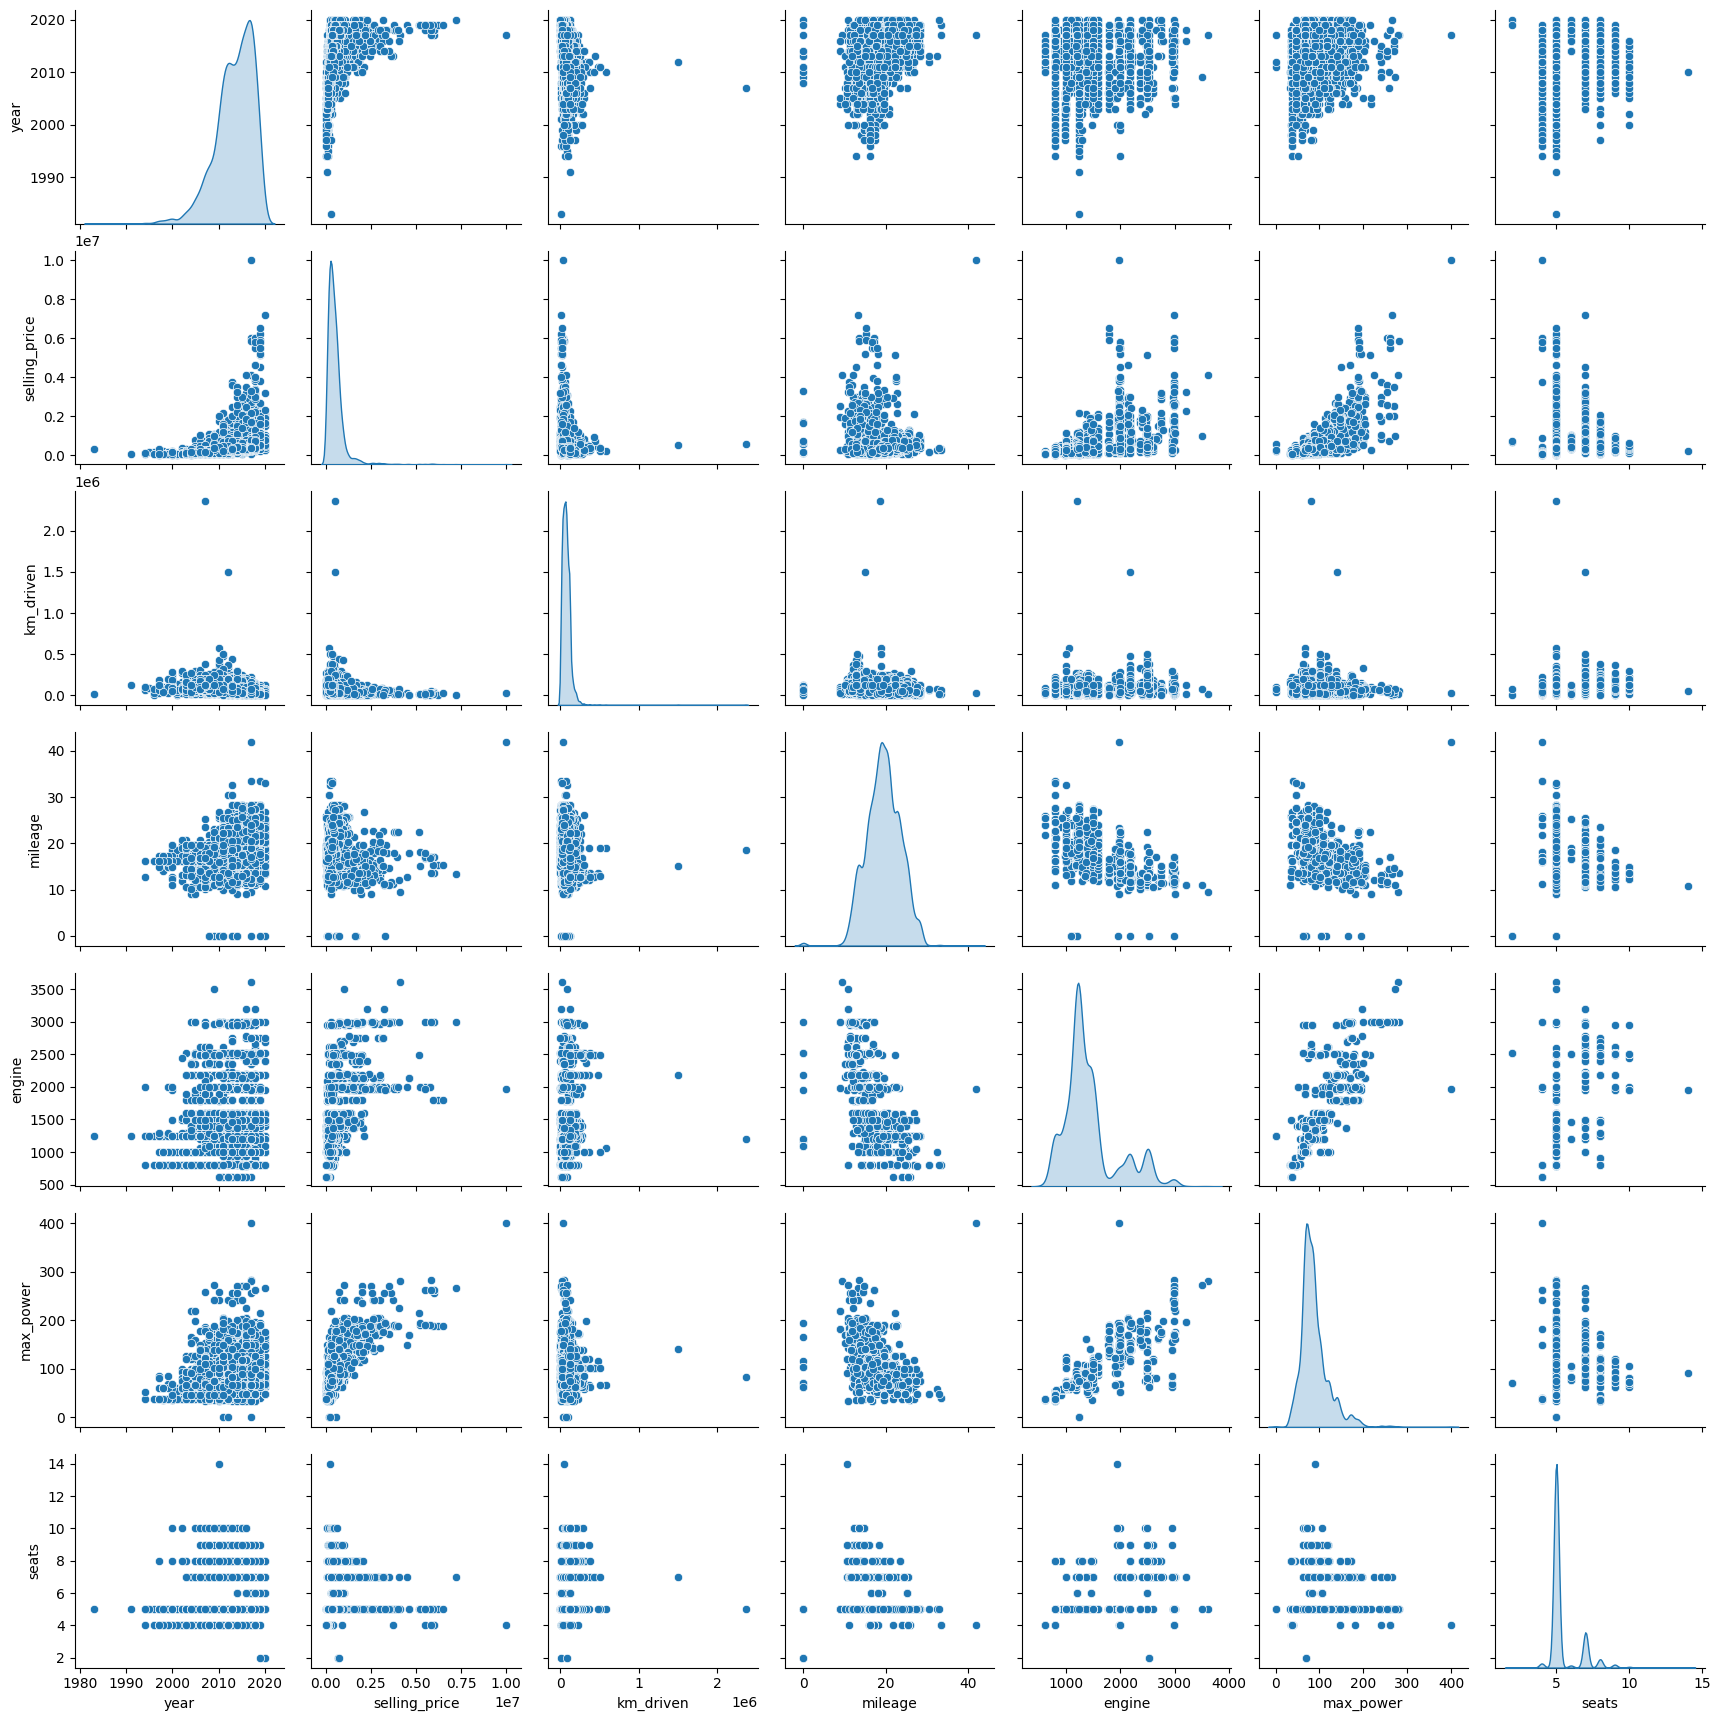

In [25]:
%matplotlib inline

num_cols = ["year", "selling_price", "km_driven", "mileage", "engine", "max_power", "seats"]

sns.pairplot(df_train[num_cols], diag_kind="kde")
plt.show()

Связь с ценой есть: новые, мощные машины стоят дороже, а с большим пробегом — дешевле.

Корреляции тоже заметны: особенно между объёмом двигателя и мощностью.

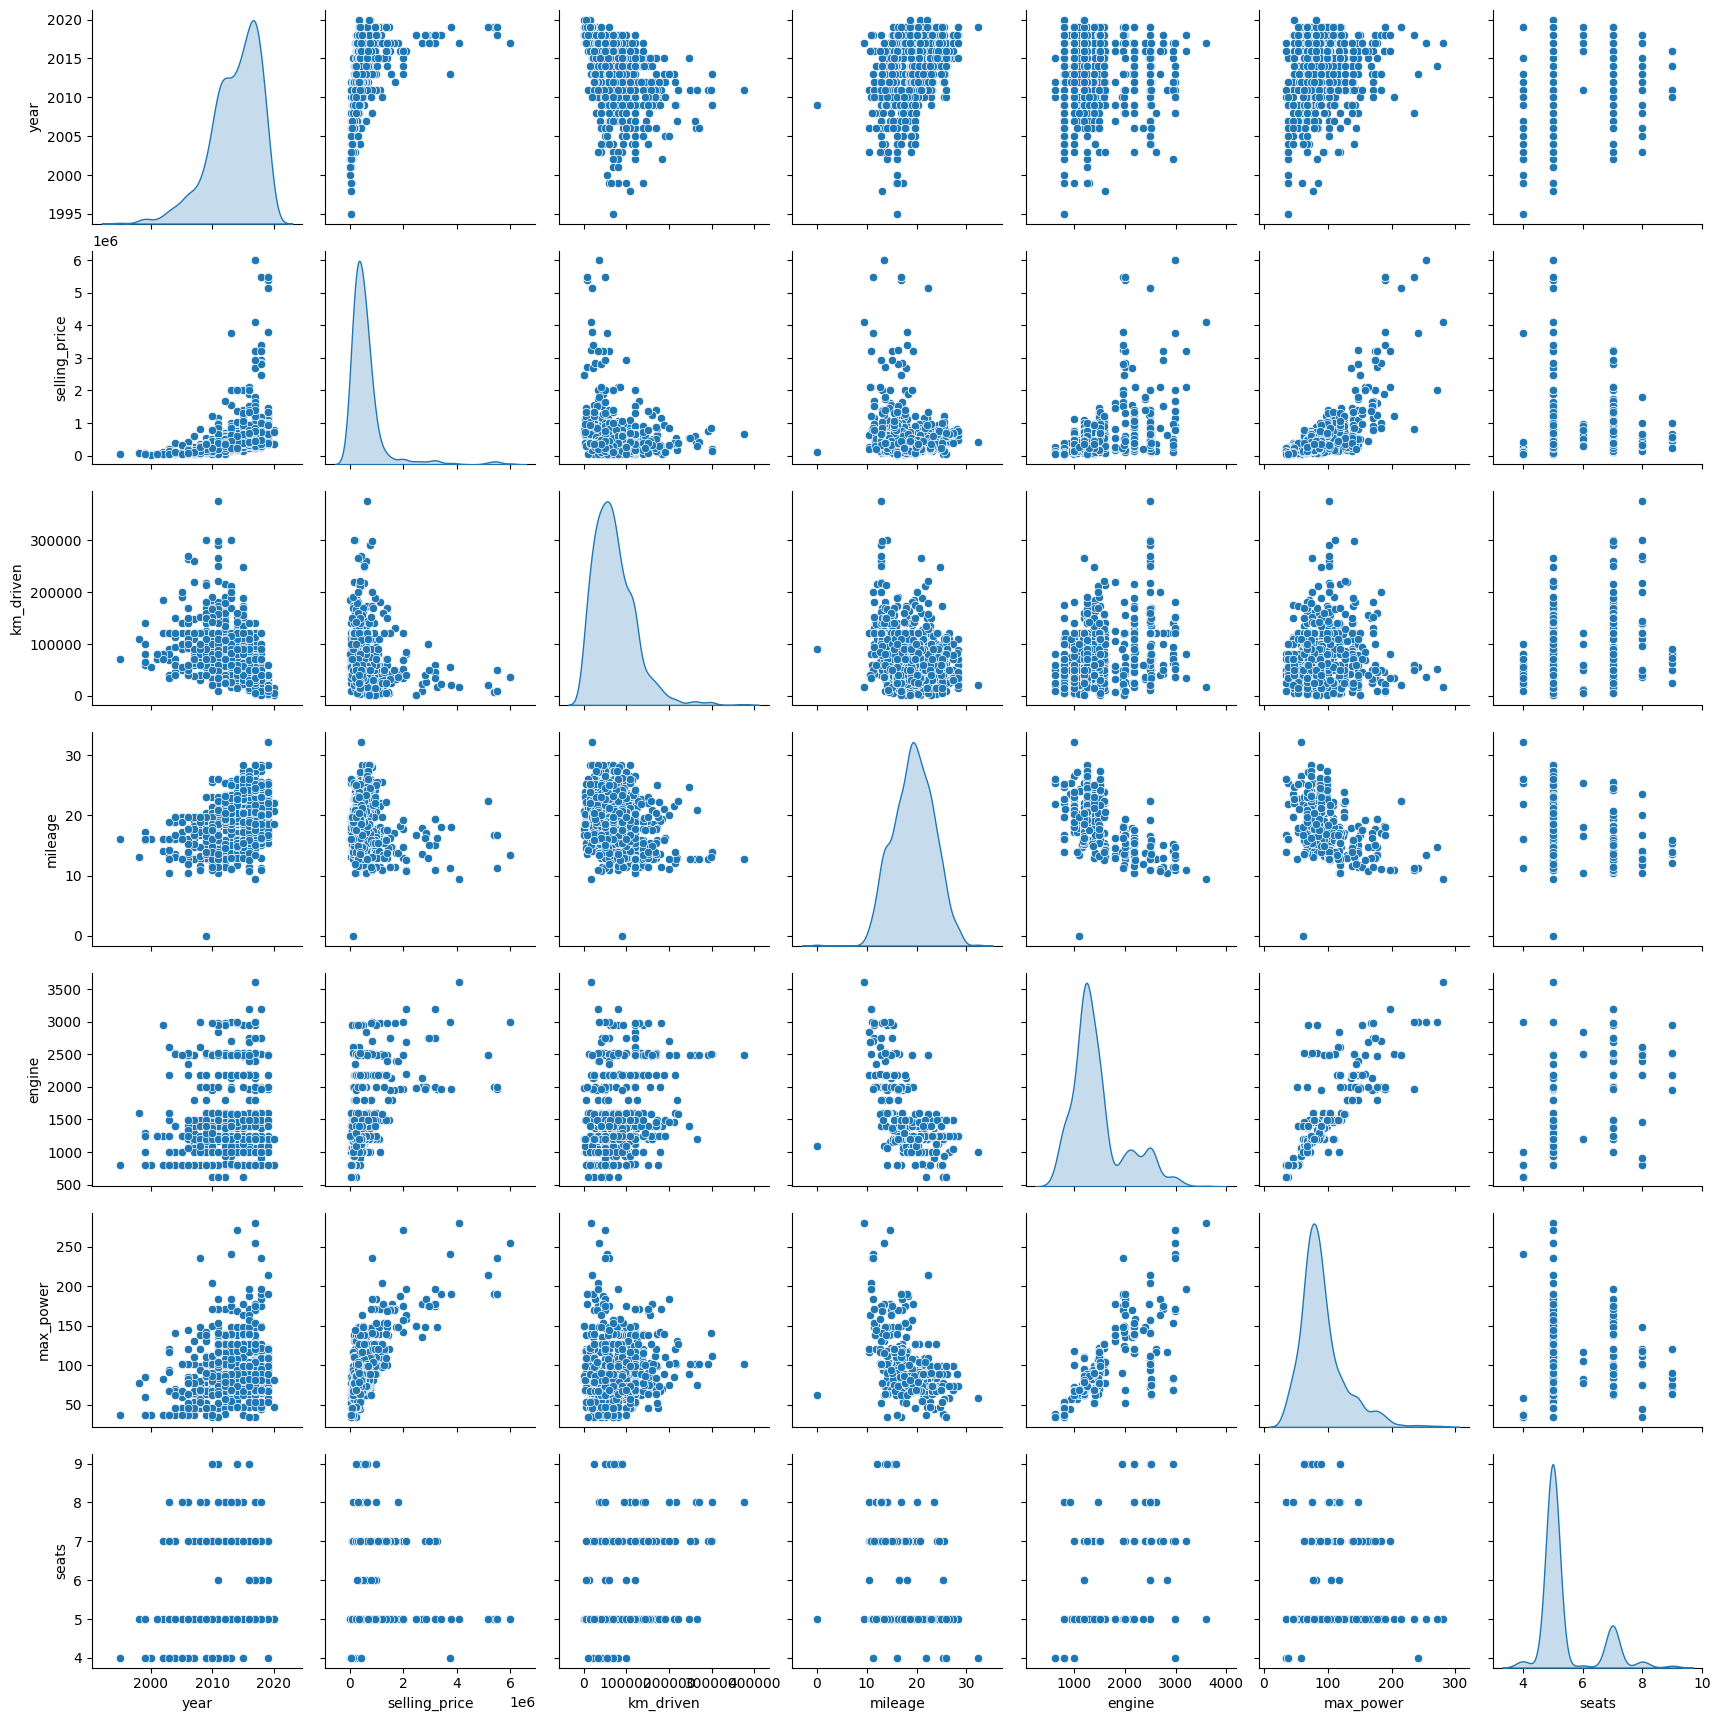

In [26]:
sns.pairplot(df_test[num_cols], diag_kind="kde")
plt.show()

Распределения почти такие же, как в train, значит выборки похожие.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [27]:
num_df = df_train.select_dtypes(include=['int64', 'float64'])

corr_matrix = num_df.corr()
corr_matrix

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.363360,0.002819,0.157376,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.105939,0.447672,0.695593,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.183538,0.229766,0.026676,0.192328
mileage,0.363360,-0.105939,-0.183538,1.000000,-0.574404,-0.374699,-0.452687
engine,0.002819,0.447672,0.229766,-0.574404,1.000000,0.680806,0.652172
max_power,0.157376,0.695593,0.026676,-0.374699,0.680806,1.000000,0.242541
seats,0.041178,0.149953,0.192328,-0.452687,0.652172,0.242541,1.000000


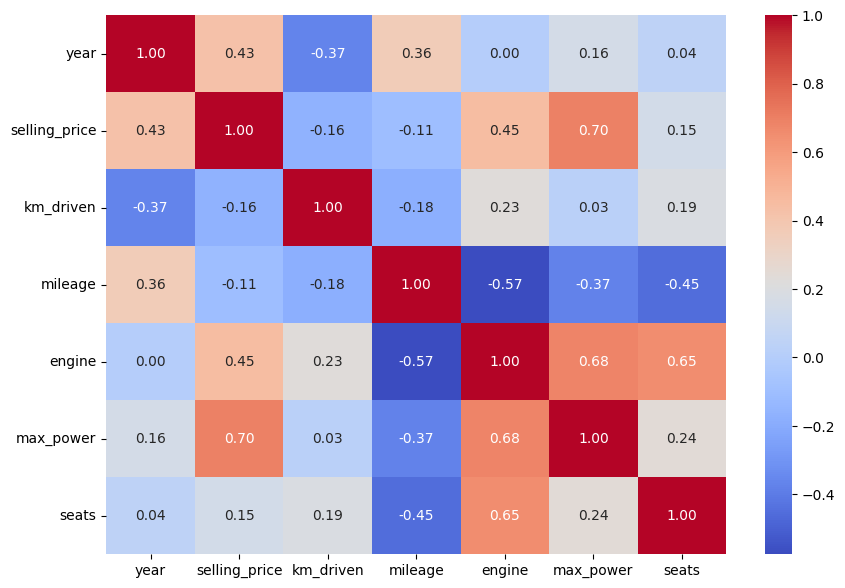

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее связаны: year и engine (почти ноль).

Сильнее всего связаны: selling_price и max_power, а также engine и max_power.

Да, старые машины обычно имеют больший пробег, хотя связь не очень сильная.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

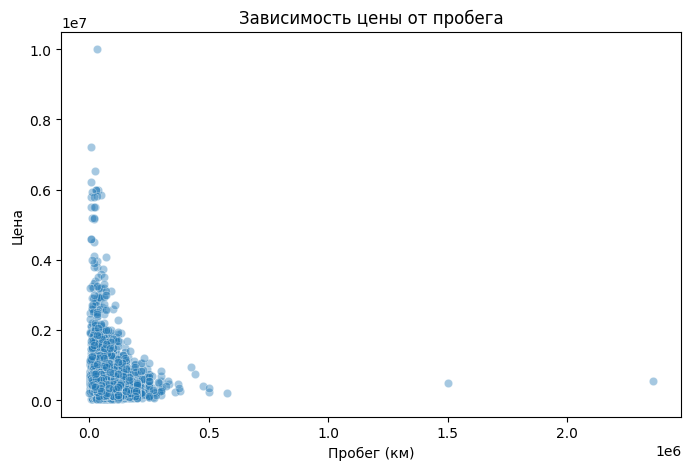

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_train, x="km_driven", y="selling_price", alpha=0.4)
plt.title("Зависимость цены от пробега")
plt.xlabel("Пробег (км)")
plt.ylabel("Цена")
plt.show()

График показывает отчётливую отрицательную зависимость: чем больше пробег, тем ниже стоимость автомобиля.

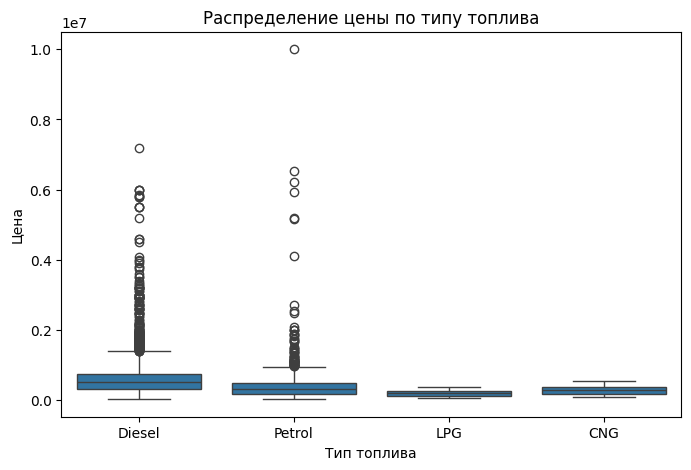

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_train, x="fuel", y="selling_price")
plt.title("Распределение цены по типу топлива")
plt.xlabel("Тип топлива")
plt.ylabel("Цена")
plt.show()

Видно, что дизельные автомобили в среднем дороже бензиновых. У них также больше разброс цен.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [31]:
train_num = df_train.copy()
test_num = df_test.copy()

cat_cols = ["name", "fuel", "seller_type", "transmission", "owner"]
train_num = train_num.drop(columns=cat_cols)
test_num = test_num.drop(columns=cat_cols)

y_train = train_num["selling_price"]
y_test = test_num["selling_price"]

X_train = train_num.drop(columns=["selling_price"])
X_test = test_num.drop(columns=["selling_price"])

Я оставила все числовые признаки: год выпуска, пробег, расход топлива, объём двигателя, мощность и количество мест.  
Эти признаки напрямую описывают характеристики автомобиля и влияют на цену, поэтому подходят для построения модели.

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [32]:
medians = X_train.median()

X_train = X_train.fillna(medians)

X_test = X_test.fillna(medians)

Ранее я заполнила пропуски в исходных числовых столбцах, однако после преобразования строковых признаков (mileage, max_power) в числа вновь появились NaN (часть значений не удалось корректно распарсить).  
Поэтому перед обучением модели я дополнительно заполнила пропуски медианами по тренировочным данным в матрицах признаков X_train и X_test.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# создаём модель
model = LinearRegression()

# обучаем
model.fit(X_train, y_train)

# предсказания
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# метрики
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)

print("R2 train:", r2_train)
print("R2 test:", r2_test)
print("MSE train:", mse_train)
print("MSE test:", mse_test)

R2 train: 0.5922591702157314
R2 test: 0.5941419794788364
MSE train: 116874153930.0286
MSE test: 233298779730.4586


/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_m

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [35]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

coefs = model_scaled.coef_

for name, coef in zip(X_train.columns, coefs):
    print(name, coef)

year 152772.57084581678
km_driven -44158.81852005294
mileage 28833.925777517
engine 61178.49433684783
max_power 322807.35325923306
seats -23209.13248599717


Мощность двигателя сильнее всего влияет на предсказание цены в линейной модели.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [36]:
from sklearn.linear_model import Lasso

#с параметрами по умолчанию (alpha=1.0)
lasso = Lasso()

# обучаем
lasso.fit(X_train_scaled, y_train)

# предсказания
y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)

# метрики
print("R2 train:", r2_score(y_train, y_pred_train_lasso))
print("R2 test:", r2_score(y_test, y_pred_test_lasso))
print("MSE train:", MSE(y_train, y_pred_train_lasso))
print("MSE test:", MSE(y_test, y_pred_test_lasso))

print("\nКоэффициенты модели Lasso:")
for name, coef in zip(X_train.columns, lasso.coef_):
    print(name, coef)

R2 train: 0.5922591701804456
R2 test: 0.5941408124026637
MSE train: 116874153940.1429
MSE test: 233299450599.16928

Коэффициенты модели Lasso:
year 152772.39021419562
km_driven -44157.68985794259
mileage 28832.043395883906
engine 61173.66240922124
max_power 322808.2369194696
seats -23206.255649080103


/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_m

Lasso не занулила признаки, потому что их мало и они все важны, а регуляризация с alpha=1.0 слишком слабая, чтобы обнулять веса.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 50, 100, 200]}

lasso = Lasso(max_iter=10000)

grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,
    scoring="r2"
)

grid.fit(X_train_scaled, y_train)

print("Лучший alpha:", grid.best_params_["alpha"])
print("Лучший score:", grid.best_score_)

best_lasso = grid.best_estimator_
lasso = best_lasso  

print("\nКоэффициенты лучшей модели:")
for name, coef in zip(X_train.columns, best_lasso.coef_):
    print(name, coef)

y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)

Лучший alpha: 200
Лучший score: 0.5683023985216126

Коэффициенты лучшей модели:
year 152726.05633009892
km_driven -43938.376134351
mileage 28472.867202308575
engine 60229.98743897074
max_power 322980.64439848345
seats -22636.18557292175


/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_m

GridSearch перебрал 80 моделей, лучшим оказался alpha = 200, и при таком значении Lasso не занулила веса, потому что все признаки оказались достаточно информативными.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [38]:
from sklearn.linear_model import ElasticNet

param_grid_en = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 50, 100, 200],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

en = ElasticNet(max_iter=10000)

grid_en = GridSearchCV(
    estimator=en,
    param_grid=param_grid_en,
    cv=10,
    scoring="r2"
)

grid_en.fit(X_train_scaled, y_train)

/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_m

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]},
             scoring='r2')

In [39]:
print("Лучшие параметры:", grid_en.best_params_)
print("Лучший score:", grid_en.best_score_)

Лучшие параметры: {'alpha': 1, 'l1_ratio': 0.9}
Лучший score: 0.5761314666976897


Для ElasticNet GridSearchCV перебрал 480 моделей.  
Лучшая модель получилась при alpha = 1 и l1_ratio = 0.9.  

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [40]:
df_train_cat = df_train.copy()
df_test_cat = df_test.copy()

df_train_cat = df_train_cat.drop(columns=["name"])
df_test_cat = df_test_cat.drop(columns=["name"])

cat_cols = ["fuel", "seller_type", "transmission", "owner"]

X_train_cat = pd.get_dummies(df_train[cat_cols], drop_first=True)
X_test_cat  = pd.get_dummies(df_test[cat_cols],  drop_first=True)

print(X_train_cat.shape)

(5840, 10)


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [41]:
assert X_train_cat.shape == (5840, 10)

In [42]:
#X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [43]:
cat_cols = df_train.select_dtypes(include="object").columns.tolist()

cat_cols.append("seats")

X_train_cat = pd.get_dummies(df_train[cat_cols], drop_first=True)
X_test_cat  = pd.get_dummies(df_test[cat_cols],  drop_first=True)

X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error as MSE

num_cols = df_train.select_dtypes(exclude="object").columns.drop("selling_price")
X_train_num = df_train[num_cols]
X_test_num  = df_test[num_cols]

cat_cols = df_train.select_dtypes(include="object").columns.tolist()
cat_cols.append("seats")

X_train_cat = pd.get_dummies(df_train[cat_cols], drop_first=True)
X_test_cat  = pd.get_dummies(df_test[cat_cols],  drop_first=True)
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

X_train_full = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_full  = pd.concat([X_test_num,  X_test_cat],  axis=1)

print("X_train_full shape:", X_train_full.shape)
print("X_test_full shape:", X_test_full.shape)

medians_full = X_train_full.median()
X_train_full = X_train_full.fillna(medians_full)
X_test_full  = X_test_full.fillna(medians_full)

print("NaN в train:", X_train_full.isna().sum().sum())
print("NaN в test:", X_test_full.isna().sum().sum())

param_grid = {"alpha": [0.01, 0.1, 1, 10, 50, 100, 200, 500]}
ridge = Ridge()

grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring="r2",
    cv=10
)

grid_ridge.fit(X_train_full, y_train)

print("Лучший alpha:", grid_ridge.best_params_["alpha"])
print("Лучший R2 (CV):", grid_ridge.best_score_)

best_ridge = grid_ridge.best_estimator_

y_pred_train = best_ridge.predict(X_train_full)
y_pred_test  = best_ridge.predict(X_test_full)

print("R2 train:", r2_score(y_train, y_pred_train))
print("R2 test:",  r2_score(y_test,  y_pred_test))
print("MSE train:", MSE(y_train, y_pred_train))
print("MSE test:",  MSE(y_test,  y_pred_test))

X_train_full shape: (5840, 1940)
X_test_full shape: (1000, 1940)
NaN в train: 0
NaN в test: 0


/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: invalid value encountered in matmul
 

Лучший alpha: 0.1
Лучший R2 (CV): 0.7742357857290684
R2 train: 0.9711737742714938
R2 test: 0.9404551090796063
MSE train: 8262701443.948389
MSE test: 34228103643.418663


/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: invalid value encountered in matmul
 

Да, Ridge-регрессия с оптимальным alpha и использованием категориальных фичей очень сильно улучшила качество прогнозов по сравнению с моделями, обученными только на вещественных признаках.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [45]:
def business_metric(y_true, y_pred):
    rel_error = abs(y_pred - y_true) / y_true
    return (rel_error <= 0.10).mean()

In [46]:
y_pred_test_lr = model.predict(X_test)
y_pred_test_lr_scaled = model_scaled.predict(X_test_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)
best_elastic = grid_en.best_estimator_
y_pred_test_elastic = best_elastic.predict(X_test_scaled)
y_pred_test_ridge = best_ridge.predict(X_test_full)

print("Business metric:")
print("")
print("Linear Regression:", business_metric(y_test, y_pred_test_lr))
print("Linear Regression (scaled):", business_metric(y_test, y_pred_test_lr_scaled))
print("Lasso:", business_metric(y_test, y_pred_test_lasso))
print("ElasticNet:", business_metric(y_test, y_pred_test_elastic))
print("Ridge:", business_metric(y_test, y_pred_test_ridge))

Business metric:

Linear Regression: 0.227
Linear Regression (scaled): 0.227
Lasso: 0.226
ElasticNet: 0.241
Ridge: 0.457


/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_m

Для бизнеса лучшей является модель Ridge, потому что она заметно чаще угадывает цену машины с приемлемой точностью.

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.

In [47]:
X_test_full.to_csv("example_input.csv", index=False)

In [48]:
import os
import pickle

model = best_ridge

model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, 'ridge_model.pkl')

with open(model_path, 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"✅ Модель сохранена: {model_path}")
print(f"   Размер файла: {os.path.getsize(model_path) / 1024:.2f} KB")

with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

#Пробуем сделать предсказание на одном объекте из теста
X_new = X_test_full.iloc[[0]] 
prediction = loaded_model.predict(X_new)

print("🔍 Пример признаков X_new:")
print(X_new.head(1))
print("\n💡 Предсказанная цена для этого объекта:", prediction[0])

✅ Модель сохранена: models/ridge_model.pkl
   Размер файла: 81.74 KB
🔍 Пример признаков X_new:
   year  km_driven  mileage  engine  max_power  seats  seats  \
0  2010     168000     14.0    2498      112.0      7      7   

   name_Ambassador Classic 2000 DSZ AC PS  \
0                                       0   

   name_Ambassador Grand 2000 DSZ PW CL  name_Audi A3 35 TDI Premium Plus  \
0                                     0                                 0   

   name_Audi A3 40 TFSI Premium  name_Audi A4 1.8 TFSI  name_Audi A4 2.0 TDI  \
0                             0                      0                     0   

   name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                                          0   

   name_Audi A4 35 TDI Premium Plus  name_Audi A6 2.0 TDI  \
0                             False                     0   

   name_Audi A6 2.0 TDI  Design Edition  name_Audi A6 2.0 TDI Technology  \
0                                     0                                0 

/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/user/Desktop/projects/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [49]:
feature_names = list(X_train_full.columns)

with open("models/feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f, protocol=pickle.HIGHEST_PROTOCOL)